### Mpi implementation of 1d_multi_grid
------------
- There was a very long queue at Stampede and therefore I was not able to run my weak scaling job in the `normal` queue. The algorithm scales pretty nicely. 

## Strong scaling
I picked $N$ to be 2^28. I fixed the iteration at each coarsining level to be 5. In the lowest level we do 50 iteration of Jacobi smoothing. I fixed the overall iteration to be 10.


   #proces       Time
0        4  24.166163
1       16  10.347527
2       32   5.137773
3       64   2.492416
4      128   1.168956
5      256   0.503421


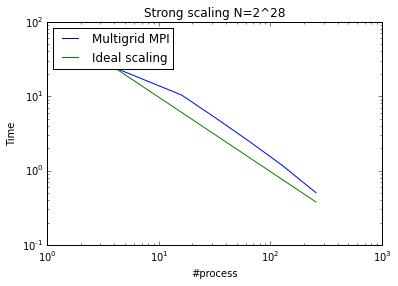

In [8]:
%matplotlib inline  

import pandas as pd

with open('./strong.8481975.out','r') as f:
    t = []
    for l in f:
        if l.startswith('Time elapsed '):
            t.append(float(l.split()[3]))

array=[4, 16, 32, 64, 128, 256]
strong_ideal = [t[0]*4/i for i in array]

table = pd.DataFrame(
    {
    '#proces': array,
    'Time': t,
    })
print table

from matplotlib import pyplot as plt
plt.plot(array,t,label='Multigrid MPI')
plt.plot(array,strong_ideal,label='Ideal scaling')
plt.xlabel('#process')
plt.ylabel('Time')
plt.title('Strong scaling N=2^28')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc=2)
plt.show()

## Weak Scaling
I've chosen the same iterations at coarsining levels(5) and the lowest level(50) and had 10 iteration of multi-grid smoothing. Each process had 2^22 numbers and therefore 21 levels. 

   #proces       Time
0        2   4.261006
1        4   5.760734
2        8  10.245365
3       16  10.314167
4       32  10.400776
5       64  10.422988


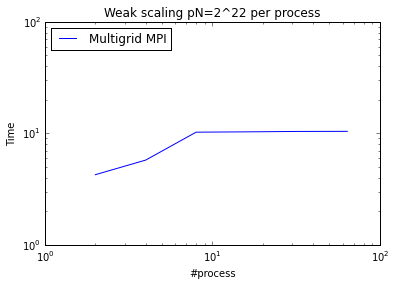

In [5]:
%matplotlib inline  

import pandas as pd

with open('./weak.8469933.out','r') as f:
    t = []
    for l in f:
        if l.startswith('Time elapsed '):
            t.append(float(l.split()[3]))

array=[2,4,8,16, 32, 64]

table = pd.DataFrame(
    {
    '#proces': array,
    'Time': t,
    })
print table

from matplotlib import pyplot as plt
plt.plot(array,t,label='Multigrid MPI')
plt.xlabel('#process')
plt.ylabel('Time')
plt.title('Weak scaling pN=2^22 per process')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc=2)
plt.show()